In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [2]:
imoveis = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2005/Base%20de%20Dados/Valorizacao_Ambiental.csv",
                    sep=";")

In [3]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [4]:
imoveis.shape

(172, 10)

In [5]:
imoveis.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [6]:
imoveis.describe().round(2)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
count,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00,172.00
mean,86.50,173541.95,163.20,5.65,4.30,1.40,0.14,505.89,0.58,0.35
std,49.80,99827.09,65.92,5.57,2.24,1.13,0.35,395.05,0.49,0.48
min,1.00,40000.00,69.00,1.00,1.00,0.00,0.00,73.00,0.00,0.00
25%,43.75,104750.00,117.00,1.00,2.75,1.00,0.00,214.75,0.00,0.00
50%,86.50,149000.00,145.00,2.50,4.00,1.00,0.00,402.50,1.00,0.00
75%,129.25,209250.00,182.00,11.00,6.00,2.00,0.00,638.00,1.00,1.00
max,172.00,579840.00,393.00,19.00,12.00,6.00,1.00,1859.00,1.00,1.00


Identificando a variável target

Text(0.5, 1.0, 'Histograma da variável de valor')

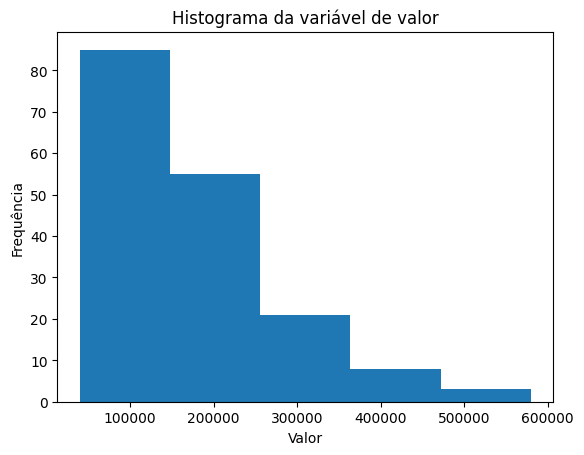

In [7]:
plt.hist(imoveis["Valor"], bins=5)

plt.ylabel("Frequência")
plt.xlabel("Valor")

plt.title("Histograma da variável de valor")

In [8]:
imoveis["raiz_valor"] = np.sqrt(imoveis["Valor"])

In [9]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


Text(0.5, 1.0, 'Histograma da variável de valor')

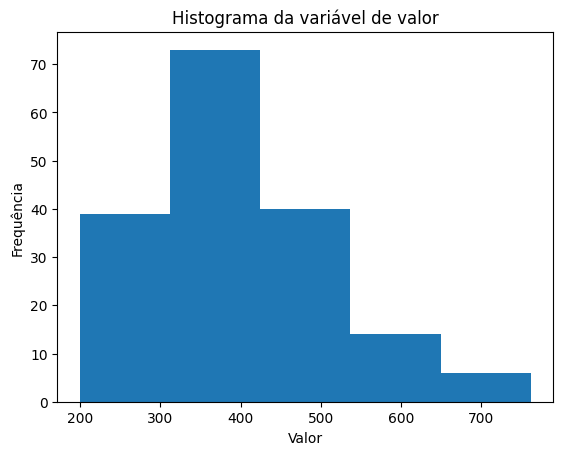

In [10]:
plt.hist(imoveis["raiz_valor"], bins=5)

plt.ylabel("Frequência")
plt.xlabel("Valor")

plt.title("Histograma da variável de valor")

Text(0, 0.5, 'Suítes')

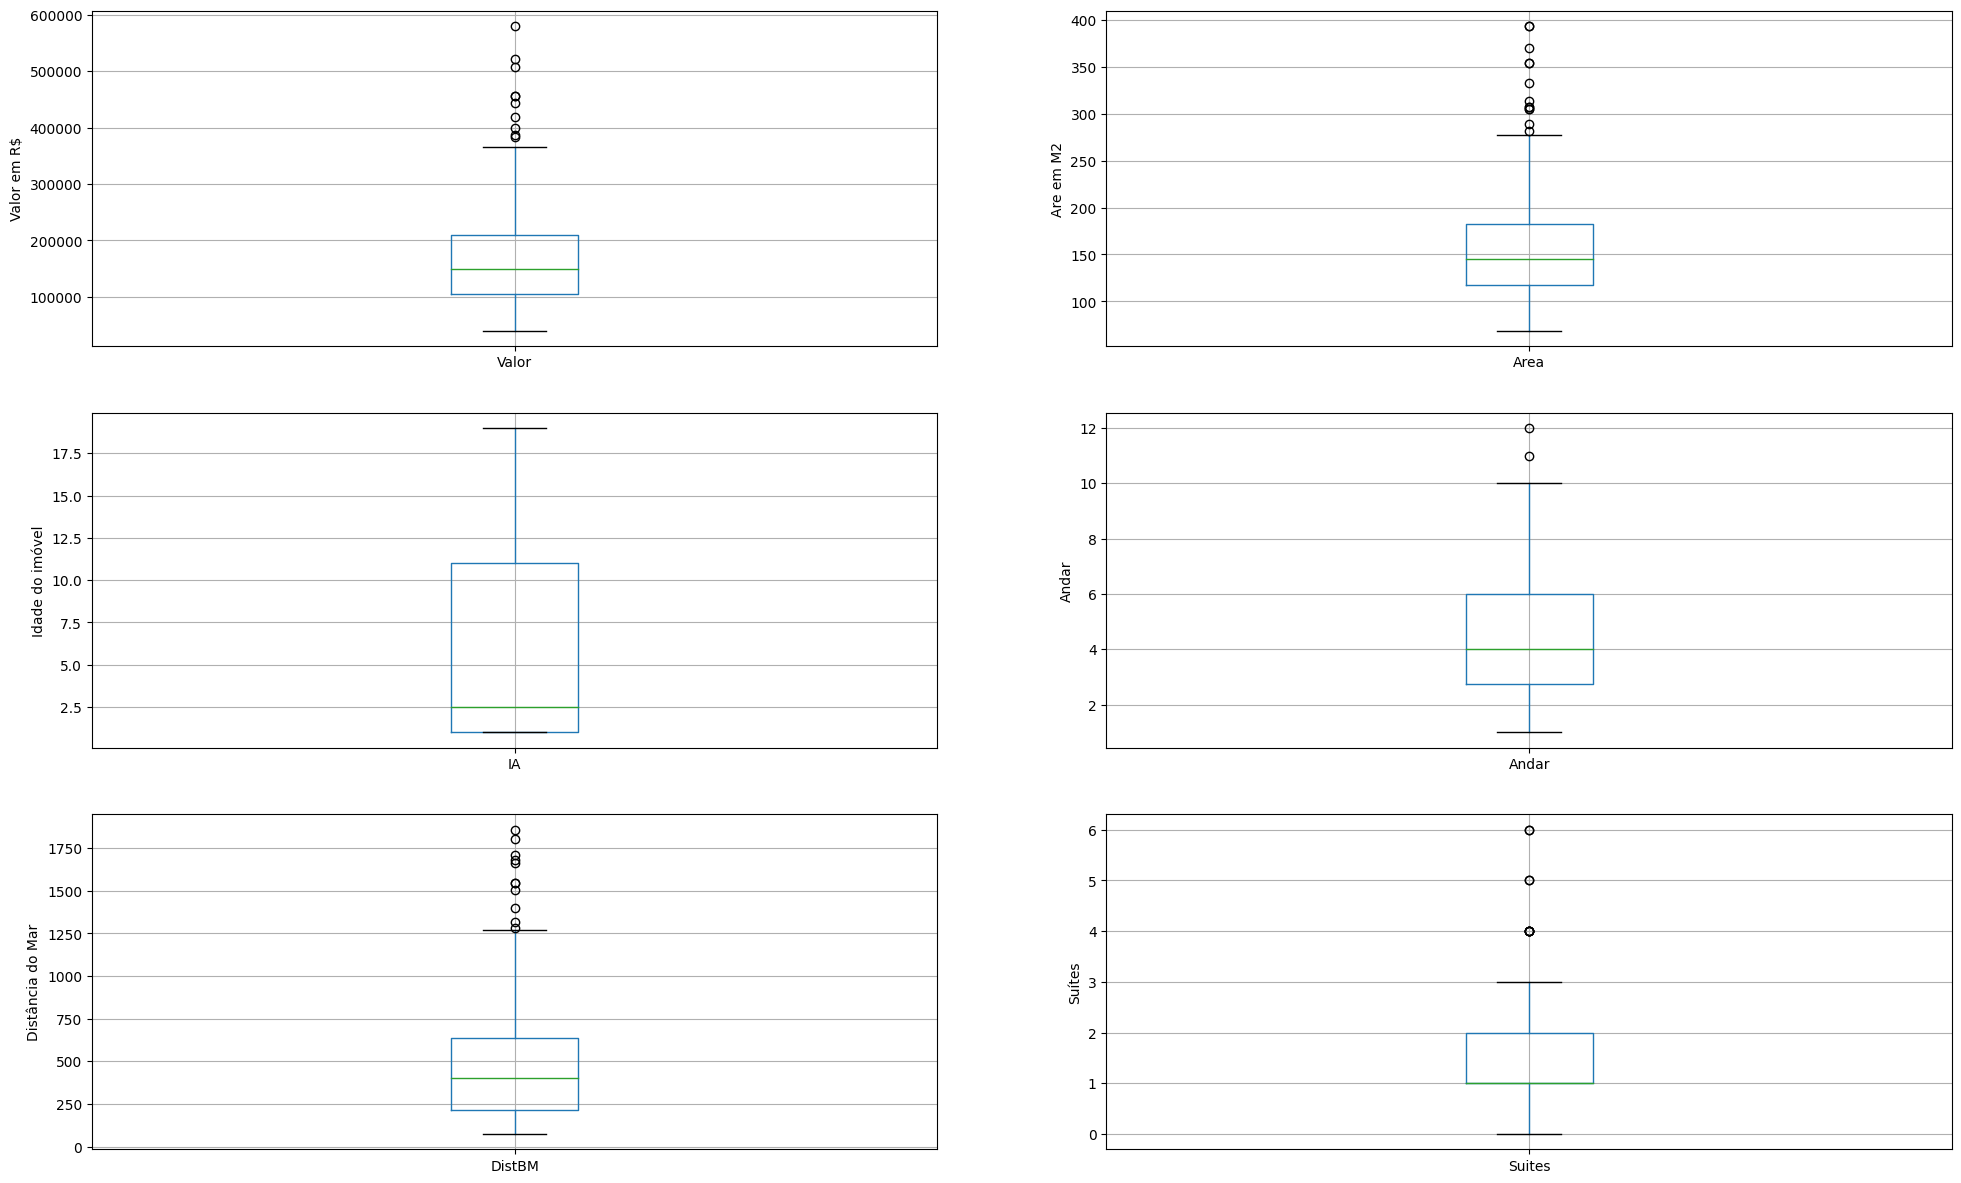

In [11]:
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = imoveis.boxplot(column="Valor")
fig.set_title("")
fig.set_ylabel("Valor em R$")

plt.subplot(4, 2, 2)
fig = imoveis.boxplot(column="Area")
fig.set_title("")
fig.set_ylabel("Are em M2")

plt.subplot(4, 2, 3)
fig = imoveis.boxplot(column="IA")
fig.set_title("")
fig.set_ylabel("Idade do imóvel")

plt.subplot(4, 2, 4)
fig = imoveis.boxplot(column="Andar")
fig.set_title("")
fig.set_ylabel("Andar")

plt.subplot(4, 2, 5)
fig = imoveis.boxplot(column="DistBM")
fig.set_title("")
fig.set_ylabel("Distância do Mar")

plt.subplot(4, 2, 6)
fig = imoveis.boxplot(column="Suites")
fig.set_title("")
fig.set_ylabel("Suítes")

<AxesSubplot: >

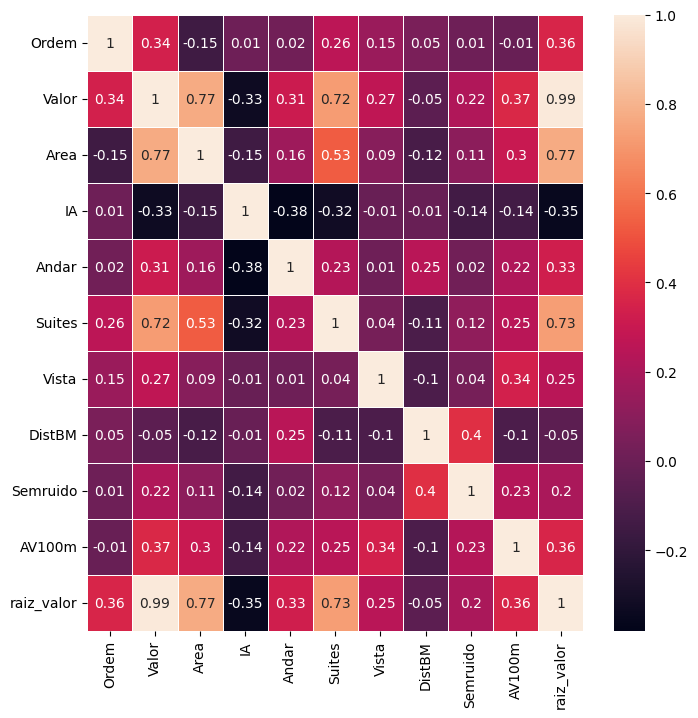

In [12]:
correlation_matrix = imoveis.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Text(0.5, 1.0, 'Area do imóvel x valor')

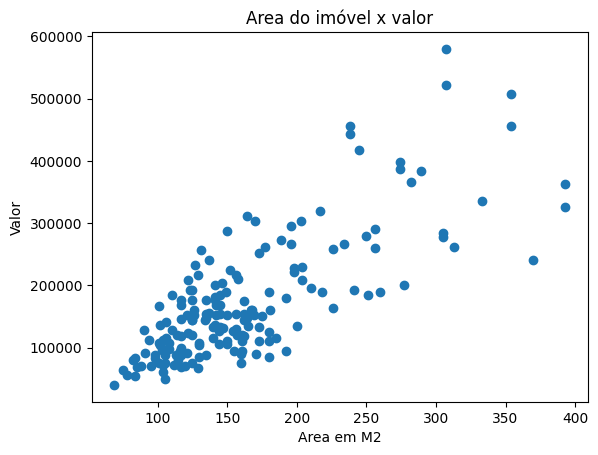

In [13]:
plt.scatter("Area", "Valor", data=imoveis)
plt.xlabel("Area em M2")
plt.ylabel("Valor")
plt.title("Area do imóvel x valor")

Text(0.5, 1.0, 'Idade do imóvel x valor')

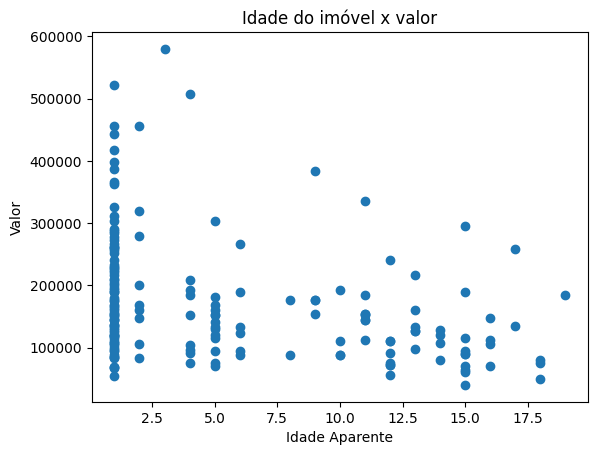

In [14]:
plt.scatter("IA", "Valor", data=imoveis)
plt.xlabel("Idade Aparente")
plt.ylabel("Valor")
plt.title("Idade do imóvel x valor")

In [15]:
imoveis.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


C:\Users\gabri\AppData\Local\Temp\ipykernel_18896\4049628597.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Vista", y="Valor", data=imoveis, palette='hls')


<AxesSubplot: xlabel='Vista', ylabel='Valor'>

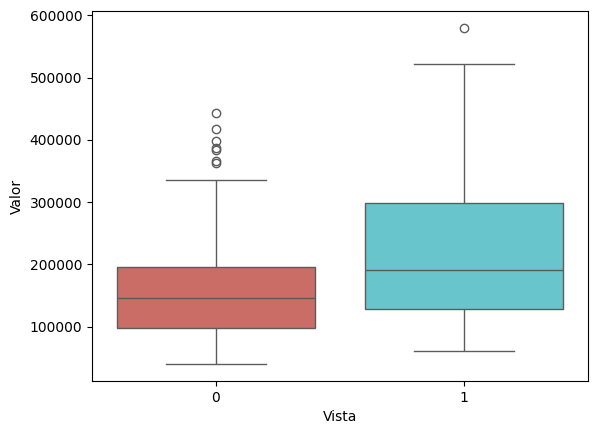

In [16]:
sns.boxplot(x="Vista", y="Valor", data=imoveis, palette='hls')

C:\Users\gabri\AppData\Local\Temp\ipykernel_18896\3016498527.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Semruido", y="Valor", data=imoveis, palette='hls')


<AxesSubplot: xlabel='Semruido', ylabel='Valor'>

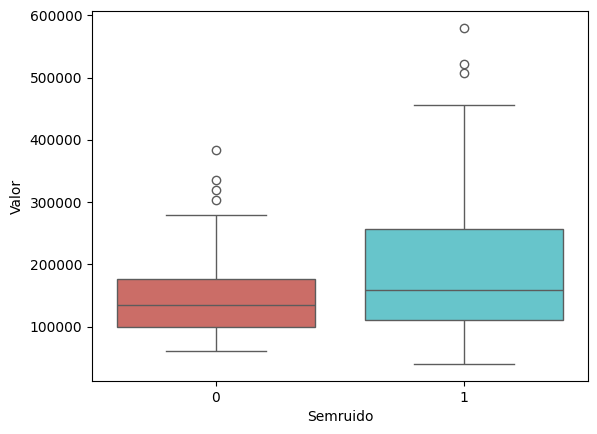

In [17]:
sns.boxplot(x="Semruido", y="Valor", data=imoveis, palette='hls')

C:\Users\gabri\AppData\Local\Temp\ipykernel_18896\4108322594.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AV100m", y="Valor", data=imoveis, palette='hls')


<AxesSubplot: xlabel='AV100m', ylabel='Valor'>

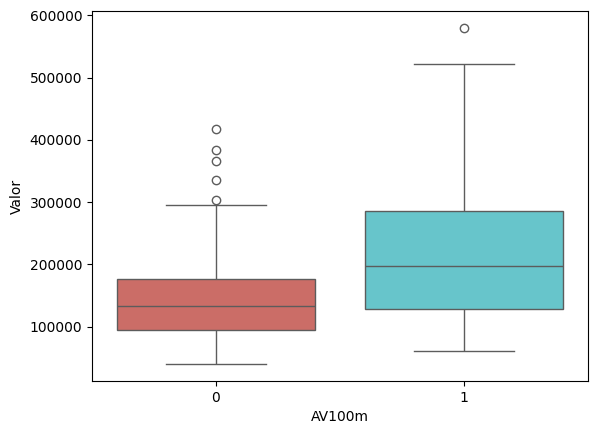

In [18]:
sns.boxplot(x="AV100m", y="Valor", data=imoveis, palette='hls')

In [19]:
lr = LinearRegression()

In [20]:
# x contém as variaveis preditoras ou independentes
x = imoveis[['Area', 'Suites', 'IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# y contém a variavel target ou dependente
y = imoveis[['Valor']]

In [21]:
# separando os dados de treino e teste do modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [22]:
# treinando o modelo
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
# calculando o valor predito da variável resposta na amostra teste
y_pred = lr.predict(x_test)

In [24]:
# olhando para o intercepto e os coeficientes da regressão
# representa o valor esperado da variável dependente quando todas as variáveis independentes são iguais
# em termos gráficos, o intercepto é o ponto onde a linha de regressão cruza o eixo vertical (eixo y)

print('Intercepto:', lr.intercept_)

Intercepto: [-40165.8752773]


In [25]:
# o coeficiente da regressão linear representam as inclinações da linha regressão para cada variavel
coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


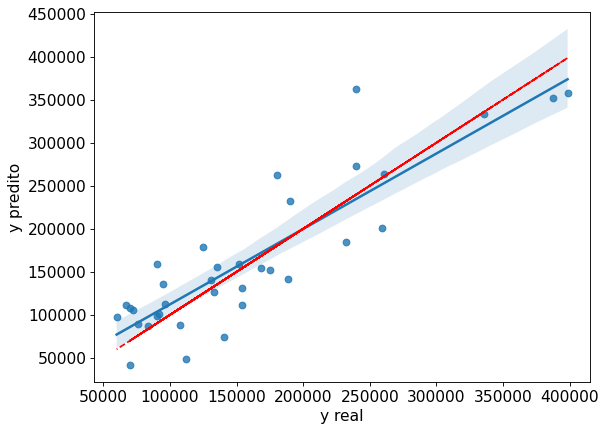

In [26]:
fig = plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size':14})
ax = sns.regplot(x=y_test, y=y_pred)
ax.set(xlabel='y real', ylabel='y predito')
ax = plt.plot(y_test, y_test, '--r')

plt.show()

In [27]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE', MAE) # mean absolute error, é a média do valor absoluto dos erros
print('MSE', MSE) # erro quadrático médio, é a média dos erros quadráticos
print('r2', r2) # r quadrado

MAE 34422.98857094557
MSE 1844288772.178987
r2 0.7584591969125033


In [28]:
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10)
model_dtr.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,101
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [29]:
y_pred_model_dtr = model_dtr.predict(x_test)

In [30]:
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)

print('MAE', MAE) # mean absolute error, é a média do valor absoluto dos erros
print('MSE', MSE) # erro quadrático médio, é a média dos erros quadráticos
print('r2', r2) # r quadrado

MAE 44913.75102040816
MSE 3223969337.3848395
r2 0.577766695417574


In [32]:
svr = SVR(kernel='linear')

In [33]:
svr.fit(x_train, y_train)

c:\Users\gabri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,1.0
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [35]:
y_pred_svr = svr.predict(x_test)

In [36]:
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print('MAE', MAE) # mean absolute error, é a média do valor absoluto dos erros
print('MSE', MSE) # erro quadrático médio, é a média dos erros quadráticos
print('r2', r2) # r quadrado

MAE 43153.53918496288
MSE 3123421996.7782364
r2 0.5909350700044546
